In [2]:
import utilities as util
import plotter as myPlotter
import preprocessor as prep
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

<h1> Distance Based Analysis </h1>

Dividing the data into five distance based groups.

In [3]:
full_hurricane_1992 = prep.process_hurricane_txt('C:/Users/Ben/Documents/GitHub/Animal-Motion-for-predictions/data/Hurricanes_Golf/hurricanes_1992.txt')
t = prep.preprocess_4_LR('C:/Users/Ben/Documents/GitHub/Animal-Motion-for-predictions/data/animals/tiger_sharks_full_more_detailed_with_dependantVar.csv')
t = prep.preprocess_all_animals(t)
start = t['date'].min() - datetime.timedelta(days=60)
end = t['date'].max() + datetime.timedelta(days=60)
hurricane_4_tigerSharks = full_hurricane_1992[(full_hurricane_1992['date']> start) & (full_hurricane_1992['date']< end)]


c:\Users\Ben\Documents\GitHub\Animal-Motion-for-predictions\src\preprocessor.py:152: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lat_column.iloc[i] = lat
c:\Users\Ben\Documents\GitHub\Animal-Motion-for-predictions\src\preprocessor.py:159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lon_column.iloc[i] = lon


In [4]:
print(full_hurricane_1992.shape)
print(hurricane_4_tigerSharks.shape)

(15444, 7)
(5054, 7)


In [6]:
# g_p = util.get_cross_points2(hurricane_4_tigerSharks,t,3000)
# g_p.to_csv('new_attempt_at_dopeness3.csv',index=False)
# g_p.head()
g_p = pd.read_csv('C:/Users/Ben/Documents/GitHub/Animal-Motion-for-predictions/data/Experiments/g_p_3000_a.csv')
g_p = prep.preprocess_4_LR('C:/Users/Ben/Documents/GitHub/Animal-Motion-for-predictions/data/Experiments/g_p_3000_a.csv')
g_p = prep.preprocess_all_animals(g_p)
print(type(g_p['date'].iloc[0]),type(g_p['depth'].iloc[0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'> <class 'numpy.float64'>


In [7]:
g_p_Galeocerdo_Cuvier = g_p
group_1 = g_p_Galeocerdo_Cuvier[(g_p_Galeocerdo_Cuvier['distance_from_event_in_km'] >= 2500) & (g_p_Galeocerdo_Cuvier['distance_from_event_in_km'] <= 3000)]
group_2 = g_p_Galeocerdo_Cuvier[(g_p_Galeocerdo_Cuvier['distance_from_event_in_km'] >= 2000) & (g_p_Galeocerdo_Cuvier['distance_from_event_in_km'] <= 2500)]
group_3 = g_p_Galeocerdo_Cuvier[(g_p_Galeocerdo_Cuvier['distance_from_event_in_km'] >= 1500) & (g_p_Galeocerdo_Cuvier['distance_from_event_in_km'] < 2000)]
group_4 = g_p_Galeocerdo_Cuvier[(g_p_Galeocerdo_Cuvier['distance_from_event_in_km'] >= 1000) & (g_p_Galeocerdo_Cuvier['distance_from_event_in_km'] < 1500)]
group_5 = g_p_Galeocerdo_Cuvier[(g_p_Galeocerdo_Cuvier['distance_from_event_in_km'] >= 700) & (g_p_Galeocerdo_Cuvier['distance_from_event_in_km'] < 1000)]
group_6 = g_p_Galeocerdo_Cuvier[(g_p_Galeocerdo_Cuvier['distance_from_event_in_km'] >= 500) & (g_p_Galeocerdo_Cuvier['distance_from_event_in_km'] < 700)]
group_7 = g_p_Galeocerdo_Cuvier[(g_p_Galeocerdo_Cuvier['distance_from_event_in_km'] >= 0) & (g_p_Galeocerdo_Cuvier['distance_from_event_in_km'] < 500)]
# group_8 = g_p_Galeocerdo_Cuvier[(g_p_Galeocerdo_Cuvier['distance_from_event_in_km'] >= 0) & (g_p_Galeocerdo_Cuvier['distance_from_event_in_km'] < 200)]
groups = [group_1,group_2,group_3,group_4,group_5,group_6,group_7]

In [9]:
dist_dict = {}
dist_dict['g1']= {}
dist_dict['g2']= {}
dist_dict['g3']= {}
dist_dict['g4']= {}
dist_dict['g5']= {}
dist_dict['g6']= {}
dist_dict['g7']= {}
# dist_dict['g8']= {}
i=0
print('Event:   before    during')
for gg in groups:
    unique_hurricanes = gg['event_name'].unique()
    dist_group_dict = {}  # Create a new dictionary for each group

    for hurri_name in unique_hurricanes:
        start_date, end_date = util.get_hurricane_dates(full_hurricane_1992, hurri_name)
        group_hurricane = gg[gg['event_name'] == hurri_name]
        start_date = start_date - datetime.timedelta(days=4)
        end_date = end_date - datetime.timedelta(days=4)
        group_before = group_hurricane[group_hurricane['date'] < start_date]
        group_during = group_hurricane[(group_hurricane['date'] >= start_date) & (group_hurricane['date'] <= end_date)]
        group_after = group_hurricane[group_hurricane['date'] > end_date]

        if group_during.shape[0] == 0:
            continue

        event_dict = {
            'event name': hurri_name,
            'start date': start_date,
            'end date': end_date,
            'before': group_before,
            'during': group_during,
            'after': group_after
        }

        dist_group_dict[hurri_name] = event_dict
        print(hurri_name, ' ',f'g{i+1}', group_before.shape,group_during.shape)

    dist_dict[f'g{i+1}'] = dist_group_dict  # Assign dist_group_dict to dist_dict after loop over hurricanes
    i += 1


Event:   before    during
ARLENE4   g1 (11, 17) (8, 17)
CHANTAL5   g1 (0, 17) (3, 17)
EARL4   g1 (8, 17) (11, 17)
EARL5   g1 (14, 17) (1, 17)
EMILY4   g1 (14, 17) (10, 17)
ERIN4   g1 (0, 17) (1, 17)
FAY3   g1 (23, 17) (12, 17)
GABRIELLE4   g1 (0, 17) (1, 17)
GASTON3   g1 (2, 17) (21, 17)
GORDON4   g1 (0, 17) (3, 17)
GRACE4   g1 (7, 17) (4, 17)
HARVEY4   g1 (9, 17) (3, 17)
HENRI3   g1 (3, 17) (4, 17)
IDA2   g1 (5, 17) (8, 17)
IGOR   g1 (4, 17) (14, 17)
IRENE3   g1 (4, 17) (6, 17)
JULIA   g1 (5, 17) (12, 17)
JULIA2   g1 (0, 17) (9, 17)
KATE2   g1 (0, 17) (5, 17)
LEE3   g1 (0, 17) (1, 17)
MELISSA2   g1 (0, 17) (1, 17)
NICOLE4   g1 (2, 17) (5, 17)
RAFAEL   g1 (30, 17) (43, 17)
ALEX4   g2 (0, 17) (13, 17)
ANDREA3   g2 (14, 17) (6, 17)
BONNIE5   g2 (17, 17) (37, 17)
CRISTOBAL3   g2 (6, 17) (5, 17)
DON   g2 (10, 17) (6, 17)
DORIAN   g2 (2, 17) (1, 17)
EIGHT3   g2 (22, 17) (3, 17)
FRED2   g2 (17, 17) (7, 17)
GABRIELLE4   g2 (52, 17) (69, 17)
GASTON3   g2 (43, 17) (27, 17)
HENRI3   g2 (2, 17) (

In [10]:
MIN_DATA_POINTS = 7  # Define your minimum data points here

filtered_dict = {key: {} for key in dist_dict.keys()}

for dist_group, events in dist_dict.items():
    for event_name, event_dict in events.items():
        before_df = event_dict['before']
        during_df = event_dict['during']
        if before_df.shape[0] >= MIN_DATA_POINTS and during_df.shape[0] >= MIN_DATA_POINTS:
            sample_size = min(before_df.shape[0], during_df.shape[0])
            before_sample_df = before_df.sample(sample_size)
            during_sample_df = during_df.sample(sample_size)
            event_dict['before'] = before_sample_df
            event_dict['during'] = during_sample_df
            filtered_dict[dist_group][event_name] = event_dict

# dist_dict = filtered_dict  # Replace the original dictionary with the filtered one


In [11]:
mean_depth_per_group = {}

for group_name, events in dist_dict.items():
    all_dfs = []
    for event_name, event_dict in events.items():
        all_dfs.append(event_dict['before'])
        all_dfs.append(event_dict['during'])
        # all_dfs.append(event_dict['after'])
    combined_df = pd.concat(all_dfs)
    mean_depth_per_group[group_name] = combined_df['depth'].mean()

print(mean_depth_per_group)


{'g1': 19.34761555859028, 'g2': 56.78656238704957, 'g3': 34.98039030193894, 'g4': 51.360457590099465, 'g5': 15.730567836513123, 'g6': -22.664417266845703, 'g7': 2.9858909346336544}


C:\Users\Ben\AppData\Local\Temp\ipykernel_26536\1965610758.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(legend_labels)


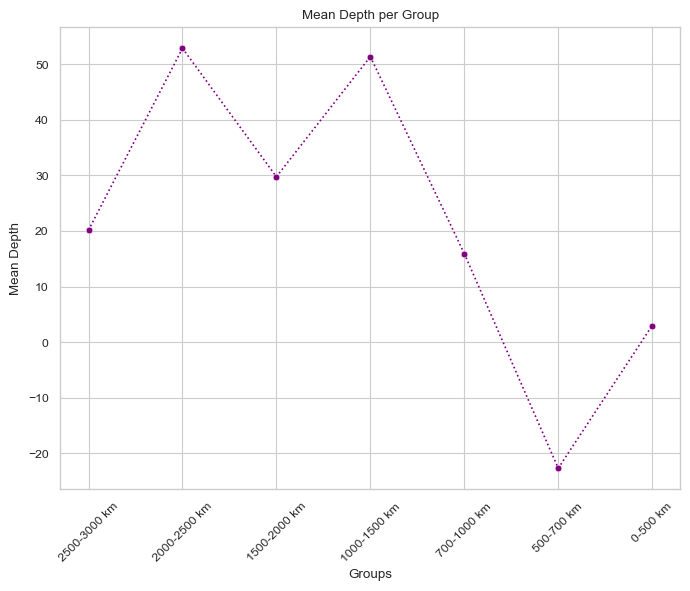

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_mean_depth(mean_depth_per_group, legend_labels):
    groups = list(mean_depth_per_group.keys())
    mean_depths = list(mean_depth_per_group.values())

    # Create a DataFrame for plotting
    data = pd.DataFrame({'Groups': groups, 'Mean Depth': mean_depths})

    # Set the style and context for the plot
    sns.set(style='whitegrid')
    sns.set_context('paper')

    # Create the scatter plot
    plt.figure(figsize=(8, 6))
    ax = sns.scatterplot(x='Groups', y='Mean Depth', data=data, color='purple')

    # Connect the dots with dotted lines
    for i in range(len(groups)-1):
        ax.plot([groups[i], groups[i+1]], [mean_depths[i], mean_depths[i+1]], linestyle='dotted', color='purple')

    # Set the labels and title
    ax.set_xlabel('Groups')
    ax.set_ylabel('Mean Depth')
    ax.set_title('Mean Depth per Group')

    # Set the x-axis labels
    ax.set_xticklabels(legend_labels)

    # Rotate the x-axis labels for better readability
    plt.xticks(rotation=45)

    # Display the plot
    plt.show()
legend_labels = ['2500-3000 km', '2000-2500 km', '1500-2000 km', '1000-1500 km', '700-1000 km','500-700 km','0-500 km','0-200 km']
plot_mean_depth(mean_depth_per_group,legend_labels)

The next block calculates the statistical difference between before and during an event for each group and prints the report  

In [12]:
variables = ['depth', 'dist from feeding spot', 
             'Barometric Pressure']

mean_values_per_group = {group_name: {'before': {}, 'during': {}} for group_name in dist_dict.keys()}

for group_name, events in dist_dict.items():
    before_dfs = []
    during_dfs = []
    
    for event_name, event_dict in events.items():
        before_dfs.append(event_dict['before'])
        during_dfs.append(event_dict['during'])
        
    combined_before_df = pd.concat(before_dfs)
    combined_during_df = pd.concat(during_dfs)
    
    for var in variables:
        mean_values_per_group[group_name]['before'][var] = combined_before_df[var].mean()
        mean_values_per_group[group_name]['during'][var] = combined_during_df[var].mean()

for group, times in mean_values_per_group.items():
    print(f"___________________________________________\nGroup: {group}\n")
    for time, var_means in times.items():
        print(f"{time.capitalize()} means:")
        for var, mean in var_means.items():
            print(f"    {var}: {mean}")


___________________________________________
Group: g1

Before means:
    depth: 25.383463216021777
    dist from feeding spot: 715.6327227964407
    Barometric Pressure: 1014.9715909090909
During means:
    depth: 14.954661346376824
    dist from feeding spot: 863.2102731832574
    Barometric Pressure: 1015.4145833333336
___________________________________________
Group: g2

Before means:
    depth: 63.775077218835676
    dist from feeding spot: 158.47578450901835
    Barometric Pressure: 1015.4875968992247
During means:
    depth: 49.8329901294224
    dist from feeding spot: 355.790643099269
    Barometric Pressure: 1014.6969696969697
___________________________________________
Group: g3

Before means:
    depth: 34.42460719784912
    dist from feeding spot: 300.6029441124286
    Barometric Pressure: 1015.1519607843137
During means:
    depth: 35.49101602882147
    dist from feeding spot: 356.27277569694814
    Barometric Pressure: 1013.9732673267325
__________________________________

<h3> Plot the Before and After mean in terms of swim depth. Color represents the distance group 

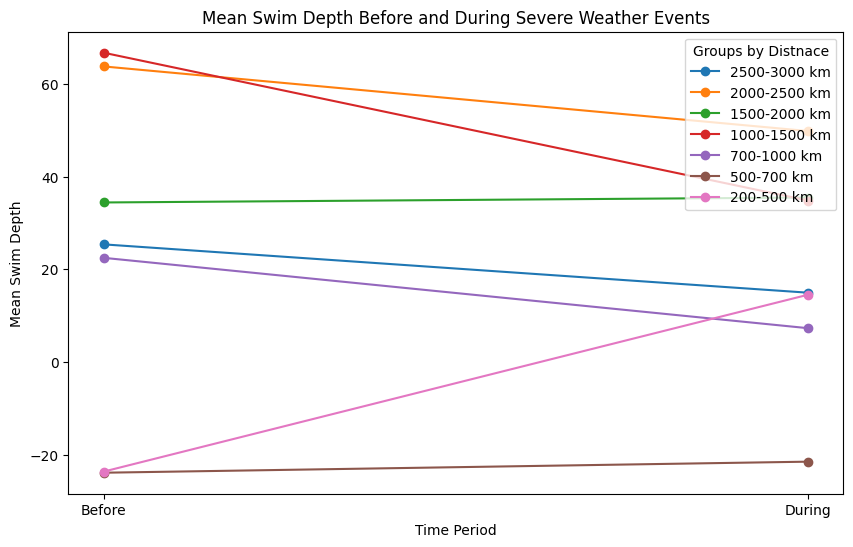

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
for group, times in mean_values_per_group.items():
    depths = [times[time]['depth'] for time in ['before', 'during']]
    plt.plot(['Before', 'During'], depths, marker='o', linestyle='-', label=group)

plt.title('Mean Swim Depth Before and During Severe Weather Events')
plt.xlabel('Time Period')
plt.ylabel('Mean Swim Depth')
legend_labels = ['2500-3000 km', '2000-2500 km', '1500-2000 km', '1000-1500 km', '700-1000 km','500-700 km','200-500 km','0-200 km']
legend = plt.legend(title='Groups by Distnace', loc='upper right',labels = legend_labels)
plt.show()


C:\Users\Ben\AppData\Local\Temp\ipykernel_26536\224408550.py:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Variable', y='Mean Value', hue='Group', data=df, ci=None)


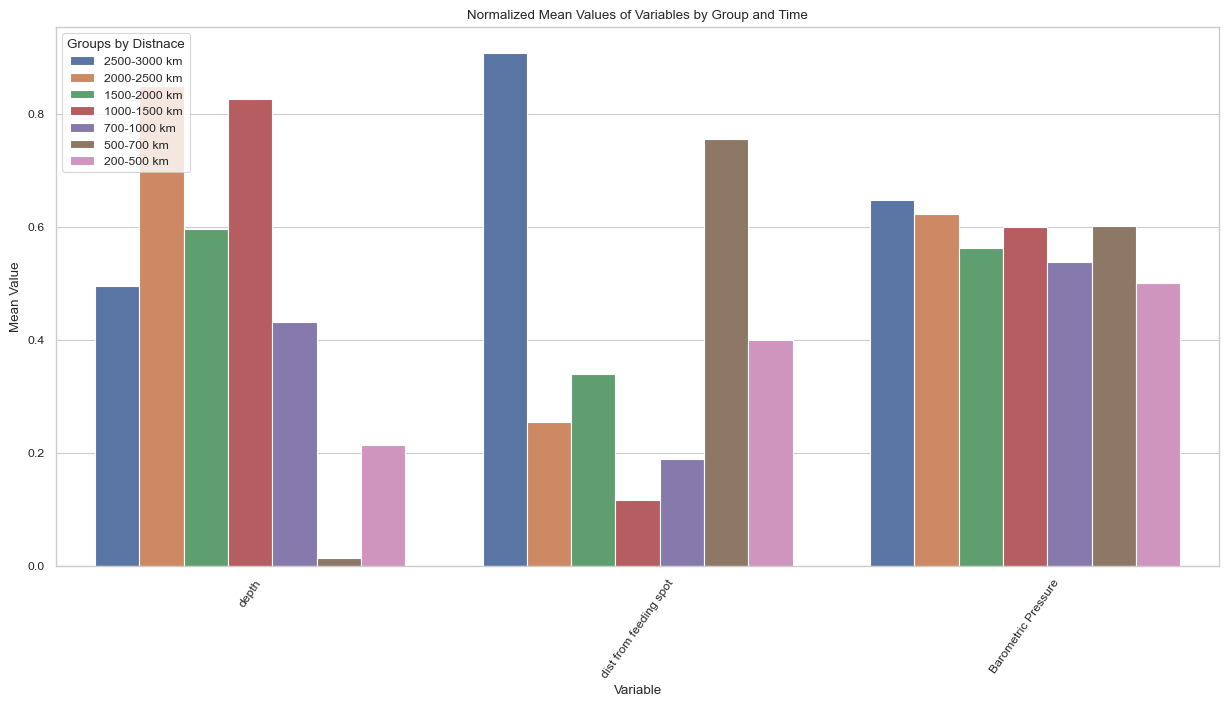

In [14]:

variables = ['depth','dist from feeding spot', 'Barometric Pressure']
data = []
for group, times in mean_values_per_group.items():
    for time, variables in times.items():
        for var, mean_value in variables.items():
            data.append([group, time, var, mean_value])
df = pd.DataFrame(data, columns=['Group', 'Time', 'Variable', 'Mean Value'])

def min_max_norm(x):
    """ Normalizing function"""
    return (x - x.min()) / (x.max() - x.min())

df['Mean Value'] = df.groupby('Variable')['Mean Value'].transform(min_max_norm)

plt.figure(figsize=(15, 7))
sns.barplot(x='Variable', y='Mean Value', hue='Group', data=df, ci=None)
plt.xticks(rotation=55)  
plt.title('Normalized Mean Values of Variables by Group and Time')

legend_labels = ['2500-3000 km', '2000-2500 km', '1500-2000 km', '1000-1500 km', '700-1000 km','500-700 km','200-500 km','0-200 km']
legend = plt.legend(title='Groups by Distnace', loc='upper left',labels = legend_labels)
plt.show()


In [14]:
values_per_group = {group_name: {'before': {}, 'during': {}} for group_name in dist_dict.keys()}

for group_name, events in dist_dict.items():
    before_dfs = []
    during_dfs = []
    
    for event_name, event_dict in events.items():
        before_dfs.append(event_dict['before'])
        during_dfs.append(event_dict['during'])
        
    # concatenate all 'before' and 'during' dfs in the group
    combined_before_df = pd.concat(before_dfs)
    combined_during_df = pd.concat(during_dfs)
    
    # store each variable for 'before' and 'during' dfs
    for var in variables:
        values_per_group[group_name]['before'][var] = combined_before_df[var]
        values_per_group[group_name]['during'][var] = combined_during_df[var]


Printing the T-tests results to determine if null hypothesis can be rejected.

In [15]:
from scipy.stats import ttest_ind
import numpy as np

for group, times in values_per_group.items():
    print(f"_________________________________________________\nGroup: {group}")
    for var in variables:
        before_values = times['before'][var].dropna()
        during_values = times['during'][var].dropna()
        
        # Check for identical values
        if np.std(before_values) > 0 and np.std(during_values) > 0:
            # Run independent t-test
            ind_t_test = ttest_ind(before_values, during_values)

            print(f'{var}:')
            print('t-statistic:', ind_t_test[0])
            print('p-value:', ind_t_test[1])
            if(ind_t_test[1] < 0.005):
                print('p-value:', ind_t_test[1], ' YES!! theres a significant difference in the means')
            else:
                print('p-value:', ind_t_test[1], ' NO!! there is no significant difference in the means')
        else:
            print(f'{var}: standard deviation is zero, t-test not applicable')


_________________________________________________
Group: g1
depth:
t-statistic: 0.951437526423162
p-value: 0.34217460005519806
p-value: 0.34217460005519806  NO!! there is no significant difference in the means
dist from feeding spot:
t-statistic: -1.1800770492469657
p-value: 0.2389333285549743
p-value: 0.2389333285549743  NO!! there is no significant difference in the means
Barometric Pressure:
t-statistic: -1.1384766361182557
p-value: 0.2564178848143664
p-value: 0.2564178848143664  NO!! there is no significant difference in the means
_________________________________________________
Group: g2
depth:
t-statistic: 1.6581833044685381
p-value: 0.09807033661157477
p-value: 0.09807033661157477  NO!! there is no significant difference in the means
dist from feeding spot:
t-statistic: -3.0448627294433366
p-value: 0.002483001730219085
p-value: 0.002483001730219085  YES!! theres a significant difference in the means
Barometric Pressure:
t-statistic: 3.4835658483663656
p-value: 0.000580736563728

<h1>Leading Up to an Event

In [16]:
from scipy.stats import ttest_rel
import numpy as np

def test_depth_change(shark_data, days_period1, days_period2):
    success_count = 0
    count=0
    for shark, df in shark_data.items():
        for event_date in df[df['severe weather event'] == True].index.unique():
            mask1 = ((df.index <= event_date) & 
                    (df.index > event_date - pd.Timedelta(days=days_period1)))
            depth_period1 = df[mask1]['depth'].values
            
            mask2 = ((df.index > event_date) & 
                    (df.index <= event_date + pd.Timedelta(days=days_period2)))
            depth_period2 = df[mask2]['depth'].values
            
            if len(depth_period1) > 0 and len(depth_period2) > 0:
                min_len = min(len(depth_period1), len(depth_period2))
                depth_period1 = np.random.choice(depth_period1, min_len, replace=False)
                depth_period2 = np.random.choice(depth_period2, min_len, replace=False)
                
                t_stat, p_val = ttest_rel(depth_period1, depth_period2)
                count+=1
                if p_val<0.005:
                    success_count+=1
    print('we can reject the null hypothesis ', ((success_count/count)*100) ,'% of the time')
    return (success_count/count)*100


shark_names = g_p_Galeocerdo_Cuvier['name'].unique()  

shark_data = {}  
for name in shark_names:
    shark_df = g_p_Galeocerdo_Cuvier[g_p_Galeocerdo_Cuvier['name'] == name]  # Filter dataframe for current shark
    shark_df.set_index('date', inplace=True)  # Set 'date' as index
    shark_data[name] = shark_df  # Add dataframe to dictionary

for i in range (1,10):

    test_depth_change(shark_data,10,i)

c:\Users\Ben\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_axis_nan_policy.py:502: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)
c:\Users\Ben\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:1214: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
c:\Users\Ben\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:1214: RuntimeWarning: invalid value encountered in double_scalars
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero


we can reject the null hypothesis  14.374999999999998 % of the time
we can reject the null hypothesis  20.05856515373353 % of the time
we can reject the null hypothesis  22.698072805139187 % of the time
we can reject the null hypothesis  22.592067988668553 % of the time
we can reject the null hypothesis  21.34831460674157 % of the time
we can reject the null hypothesis  21.59329140461216 % of the time
we can reject the null hypothesis  22.926829268292686 % of the time
we can reject the null hypothesis  22.20680083275503 % of the time
we can reject the null hypothesis  21.79930795847751 % of the time


In [20]:
rates = []
for i in range (1,7):
    rates.append(test_depth_change(shark_data,i,7))

we can reject the null hypothesis  17.630662020905923 % of the time
we can reject the null hypothesis  19.65156794425087 % of the time
we can reject the null hypothesis  21.18466898954704 % of the time
we can reject the null hypothesis  21.881533101045296 % of the time
we can reject the null hypothesis  22.229965156794425 % of the time
we can reject the null hypothesis  22.64808362369338 % of the time


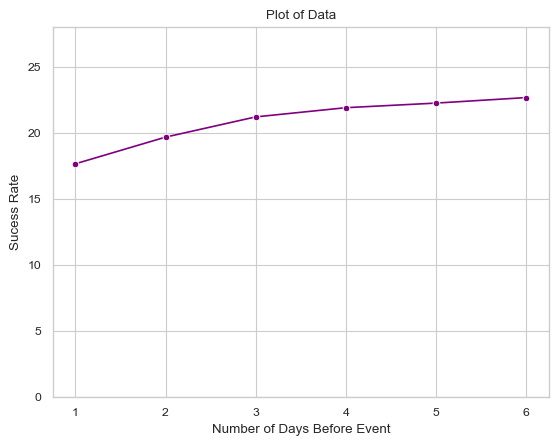

In [22]:
data= rates
index = range(1, len(data) + 1)
sns.lineplot(x=index, y=data, marker='o',color = 'purple')
plt.xlabel('Number of Days Before Event')
plt.ylabel('Sucess Rate')
plt.ylim(0,28)
plt.title('Plot of Data')
plt.show()
